In [ ]:
!pip install xlrd==1.2.0
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
path = '/content/gdrive/My Drive/Project/NLP'
%cd $path

Mounted at /content/gdrive
/content/gdrive/My Drive/Project/NLP


In [15]:
#Khai báo thư viện

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from nltk.corpus import stopwords
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **ĐỌC & TIỀN XỬ LÍ DỮ LIỆU**


In [4]:
#đọc data
cmt_data = pd.read_csv('/content/gdrive/MyDrive/Project/NLP/Comments.csv')

cus_data = pd.read_csv('/content/gdrive/MyDrive/Project/NLP/Customers.csv')
print(cmt_data.shape)
print(cus_data.shape)

(2070, 2)
(2070, 17)


In [5]:
cmt_data.info()
cmt_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2070 non-null   int64 
 1   Comments  2070 non-null   object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


,ID,Comments
0,1309,Does not like the way the phone works. It is t...
1,3556,Wanted to know the nearest store location. Wan...
2,2230,Wants to know how to do text messaging. Referr...
3,2312,Asked how to disable call waiting. referred hi...
4,3327,Needs help learning how to use the phone. I su...


In [6]:
cus_data.info()
cus_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2070 non-null   int64  
 1   Sex                   2070 non-null   object 
 2   Status                2070 non-null   object 
 3   Children              2070 non-null   int64  
 4   Est_Income            2070 non-null   float64
 5   Car_Owner             2070 non-null   object 
 6   Usage                 2070 non-null   float64
 7   Age                   2070 non-null   float64
 8   RatePlan              2070 non-null   int64  
 9   LongDistance          2070 non-null   float64
 10  International         2070 non-null   float64
 11  Local                 2070 non-null   float64
 12  Dropped               2070 non-null   int64  
 13  Paymethod             2070 non-null   object 
 14  LocalBilltype         2070 non-null   object 
 15  LongDistanceBilltype 

,ID,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,TARGET
0,1,F,S,1,38000.00,N,229.64,24.393333,3,23.56,0.0,206.08,0,CC,Budget,Intnl_discount,Cancelled
1,6,M,M,2,29616.00,N,75.29,49.426667,2,29.78,0.0,45.50,0,CH,FreeLocal,Standard,Current
2,8,M,M,0,19732.80,N,47.25,50.673333,3,24.81,0.0,22.44,0,CC,FreeLocal,Standard,Current
3,11,M,S,2,96.33,N,59.01,56.473333,1,26.13,0.0,32.88,1,CC,Budget,Standard,Current
4,14,F,M,2,52004.80,N,28.14,25.140000,1,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,Cancelled


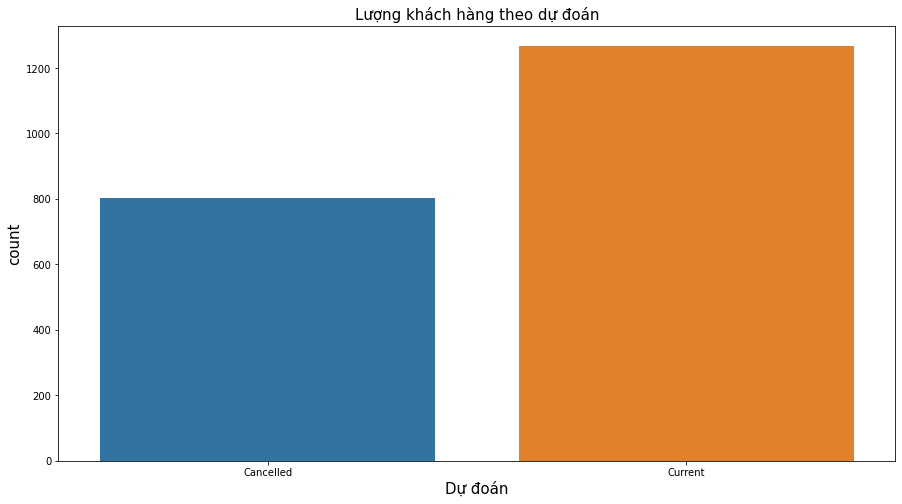

In [17]:
plt.figure(figsize = (15, 8))
pl = sns.countplot(x=cus_data["TARGET"])
pl.set_title("Lượng khách hàng theo dự đoán",fontsize=15)
pl.set_xlabel("Dự đoán",fontsize=15)
pl.set_ylabel("count",fontsize=15)
plt.show()

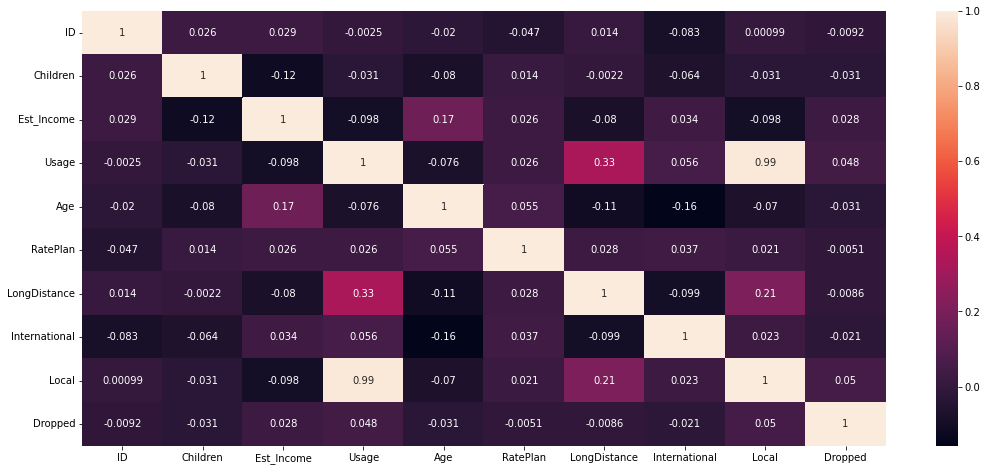

In [8]:
plt.figure(figsize = (18, 8))
sns.heatmap(cus_data.corr(), annot = True)
plt.show()

In [13]:
# SNOWBALL STEMMER
# dùng English stemmer.
Stemmer = SnowballStemmer("english")
# Tokenize - chia câu thành list chứa từ
cmt_data['CommentsTokenized'] = cmt_data['Comments'].apply(word_tokenize)

# tiến hành stemming - tạo dataframe chứa stemmed version
NewTextData=pd.DataFrame()
NewTextData=cmt_data.drop(columns=["CommentsTokenized","Comments"])
NewTextData['CommentsTokenizedStemmed'] = cmt_data['CommentsTokenized'].apply(lambda x: [Stemmer.stem(y) for y in x]) # Stem every word.

#nối các chuỗi được stemmed
NewTextData['CommentsTokenizedStemmed'] = NewTextData['CommentsTokenizedStemmed'].apply(lambda x: " ".join(x))
NewTextData

,ID,CommentsTokenizedStemmed
0,1309,doe not like the way the phone work . it is to...
1,3556,want to know the nearest store locat . want to...
2,2230,want to know how to do text messag . refer him...
3,2312,ask how to disabl call wait . refer him to web...
4,3327,need help learn how to use the phone . i sugge...
...,...,...
2065,3034,need help figur out his bill . i explain our m...
2066,271,he lost his phone and call to cancel servic . ...
2067,783,lost the direct to phone and want anoth manual...
2068,1295,want to chang address .


In [18]:
#Bag-Of-Words model - Term - Document Matrix

count_vect = CountVectorizer(stop_words='english',lowercase=False)
TD_counts = count_vect.fit_transform(NewTextData.CommentsTokenizedStemmed)
TD_counts.dtype
print(count_vect.get_feature_names_out())
print("No. of stem words in SNOWBALL stemmer is : ",len(count_vect.get_feature_names_out()))
DF_TD_Counts=pd.DataFrame(TD_counts.toarray())
print(DF_TD_Counts)

['3399' '3g' 'abysm' 'access' 'accessori' 'adapt' 'add' 'addit' 'additon'
 'address' 'adit' 'adress' 'advertis' 'afraid' 'alway' 'angel' 'angri'
 'ani' 'anoth' 'anyth' 'anytim' 'area' 'asap' 'ask' 'bad' 'basic' 'bateri'
 'batteri' 'becaus' 'believ' 'better' 'bigger' 'book' 'bought' 'brain'
 'bring' 'built' 'busi' 'button' 'buy' 'cancel' 'cancer' 'car' 'care'
 'carrier' 'caus' 'cc' 'cell' 'certain' 'chang' 'charg' 'charger' 'check'
 'chip' 'citi' 'claim' 'cleariti' 'cold' 'comapr' 'compani' 'compar'
 'competit' 'complain' 'complaint' 'concept' 'connect' 'consisit'
 'consist' 'constan' 'contact' 'continu' 'contract' 'correct' 'cost'
 'coupl' 'cover' 'coverag' 'creat' 'credit' 'cstmer' 'cstmr' 'current'
 'cust' 'custom' 'customr' 'date' 'day' 'dead' 'decent' 'defect' 'deo'
 'did' 'die' 'differ' 'difficult' 'digiti' 'direct' 'disabl' 'doe' 'don'
 'dont' 'drop' 'dure' 'easier' 'effect' 'encount' 'end' 'enemi' 'equip'
 'everytim' 'everywher' 'evrey' 'exact' 'expect' 'expir' 'explain'
 'facep

In [19]:
#ma trận TF-IDF
tf_idf_transformer = TfidfTransformer()
X_Train_tfidf = tf_idf_transformer.fit_transform(TD_counts)
print(X_Train_tfidf.shape)
df_tf_idf = pd.DataFrame(X_Train_tfidf.toarray())
print(df_tf_idf)

(2070, 354)
      0    1    2    3        4    5    6    7    8         9    ...  344  \
0     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
1     0.0  0.0  0.0  0.0  0.27568  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
2     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
3     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
4     0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
...   ...  ...  ...  ...      ...  ...  ...  ...  ...       ...  ...  ...   
2065  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
2066  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
2067  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   
2068  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.772949  ...  0.0   
2069  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.000000  ...  0.0   

      345  346       347  348  349  350  351  352  353  
0     

In [22]:
Y_Train = cus_data["TARGET"]
X_Train = cus_data.drop(columns=["TARGET"]) #bỏ cột target trong x_train
                     
print(X_Train.shape)
print(cmt_data.shape)
cmt_data.head()
print(X_Train)
print(Y_Train)

(2070, 16)
(2070, 3)
        ID Sex Status  Children  Est_Income Car_Owner   Usage        Age  \
0        1   F      S         1    38000.00         N  229.64  24.393333   
1        6   M      M         2    29616.00         N   75.29  49.426667   
2        8   M      M         0    19732.80         N   47.25  50.673333   
3       11   M      S         2       96.33         N   59.01  56.473333   
4       14   F      M         2    52004.80         N   28.14  25.140000   
...    ...  ..    ...       ...         ...       ...     ...        ...   
2065  3821   F      S         0    78851.30         N   29.04  48.373333   
2066  3822   F      S         1    17540.70         Y   36.20  62.786667   
2067  3823   F      M         0    83891.90         Y   74.40  61.020000   
2068  3824   F      M         2    28220.80         N   38.95  38.766667   
2069  3825   F      S         0    28589.10         N  100.28  15.600000   

      RatePlan  LongDistance  International   Local  Dropped Payme

In [23]:
new_df_tf_idf = SelectKBest(score_func=chi2, k=50).fit_transform(df_tf_idf,Y_Train)
new_df_tf_idf.shape

DF_TF_IDF_SelectedFeatures= pd.DataFrame(new_df_tf_idf)
print(DF_TF_IDF_SelectedFeatures)

            0    1    2    3         4         5    6         7    8    9   \
0     0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.465653  0.0  0.0   
1     0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0   
2     0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0   
3     0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0   
4     0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0   
...        ...  ...  ...  ...       ...       ...  ...       ...  ...  ...   
2065  0.000000  0.0  0.0  0.0  0.000000  0.446161  0.0  0.000000  0.0  0.0   
2066  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0   
2067  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0   
2068  0.772949  0.0  0.0  0.0  0.545354  0.000000  0.0  0.000000  0.0  0.0   
2069  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.0   

      ...   40       41   42   43   44   45   46   47   48   49

In [24]:
#merge df
print(cus_data.shape)
combined = pd.concat([cus_data,DF_TF_IDF_SelectedFeatures], axis=1)
print(combined.shape)
print(combined)

(2070, 17)
(2070, 67)
        ID Sex Status  Children  Est_Income Car_Owner   Usage        Age  \
0        1   F      S         1    38000.00         N  229.64  24.393333   
1        6   M      M         2    29616.00         N   75.29  49.426667   
2        8   M      M         0    19732.80         N   47.25  50.673333   
3       11   M      S         2       96.33         N   59.01  56.473333   
4       14   F      M         2    52004.80         N   28.14  25.140000   
...    ...  ..    ...       ...         ...       ...     ...        ...   
2065  3821   F      S         0    78851.30         N   29.04  48.373333   
2066  3822   F      S         1    17540.70         Y   36.20  62.786667   
2067  3823   F      M         0    83891.90         Y   74.40  61.020000   
2068  3824   F      M         2    28220.80         N   38.95  38.766667   
2069  3825   F      S         0    28589.10         N  100.28  15.600000   

      RatePlan  LongDistance  ...   40       41   42   43   44   

In [ ]:
categorical_features = ["Sex","Status","Car_Owner","Paymethod","LocalBilltype","LongDistanceBilltype"]
print(categorical_features)
df_combined = pd.get_dummies(combined,columns=categorical_features) 
print(df_combined.head())

['Sex', 'Status', 'Car_Owner', 'Paymethod', 'LocalBilltype', 'LongDistanceBilltype']
   ID  Children  Est_Income   Usage        Age  RatePlan  LongDistance  \
0   1         1    38000.00  229.64  24.393333         3         23.56   
1   6         2    29616.00   75.29  49.426667         2         29.78   
2   8         0    19732.80   47.25  50.673333         3         24.81   
3  11         2       96.33   59.01  56.473333         1         26.13   
4  14         2    52004.80   28.14  25.140000         1          5.03   

   International   Local  Dropped  ... Status_S  Car_Owner_N  Car_Owner_Y  \
0            0.0  206.08        0  ...        1            1            0   
1            0.0   45.50        0  ...        0            1            0   
2            0.0   22.44        0  ...        0            1            0   
3            0.0   32.88        1  ...        1            1            0   
4            0.0   23.11        0  ...        0            1            0   

   Paym

# **Model**

In [ ]:
X_Train1, X_Test1, Y_Train1, Y_Test1 = train_test_split(df_combined.drop(columns=["TARGET"]), 
                                                        df_combined["TARGET"], 
                                                        test_size=0.20, random_state=42)
print('Training dataset shape:', X_Train1.shape, Y_Train1)
print('Testing dataset shape:', X_Test1.shape, Y_Test1)

Training dataset shape: (1656, 74) 849       Current
1043    Cancelled
175       Current
1228      Current
538     Cancelled
          ...    
1638      Current
1095      Current
1130      Current
1294      Current
860       Current
Name: TARGET, Length: 1656, dtype: object
Testing dataset shape: (414, 74) 1181      Current
69        Current
351     Cancelled
1163    Cancelled
429       Current
          ...    
1532      Current
1671      Current
416       Current
2023      Current
1428      Current
Name: TARGET, Length: 414, dtype: object


### SVM

In [ ]:
#model SVM
svm = SVC()
svm_text = svm.fit(X_Train1.values,Y_Train1.values)
print("Accuracy score (training): {0:.6f}".format(svm.score(X_Test1.values, Y_Test1.values)))
rf_predictions = svm.predict(X_Test1.values)
print("Confusion Matrix:")
print(confusion_matrix(Y_Test1.values, rf_predictions))
print("Classification Report")
print(classification_report(Y_Test1.values, rf_predictions))

Accuracy score (training): 0.620773
Confusion Matrix:
[[  0 157]
 [  0 257]]
Classification Report
              precision    recall  f1-score   support

   Cancelled       0.00      0.00      0.00       157
     Current       0.62      1.00      0.77       257

    accuracy                           0.62       414
   macro avg       0.31      0.50      0.38       414
weighted avg       0.39      0.62      0.48       414



### kNN

In [ ]:
#model kNN
knn = KNeighborsClassifier()
knn_text = knn.fit(X_Train1.values,Y_Train1.values)
print("Accuracy score (training): {0:.6f}".format(knn.score(X_Test1.values, Y_Test1.values)))
rf_predictions = knn.predict(X_Test1.values)
print("Confusion Matrix:")
print(confusion_matrix(Y_Test1.values, rf_predictions))
print("Classification Report")
print(classification_report(Y_Test1.values, rf_predictions))

Accuracy score (training): 0.669082
Confusion Matrix:
[[ 82  75]
 [ 62 195]]
Classification Report
              precision    recall  f1-score   support

   Cancelled       0.57      0.52      0.54       157
     Current       0.72      0.76      0.74       257

    accuracy                           0.67       414
   macro avg       0.65      0.64      0.64       414
weighted avg       0.66      0.67      0.67       414



In [ ]:
from sklearn.metrics         import accuracy_score, precision_score, f1_score

In [ ]:
Y_Test2 = Y_Test1.map({'Current': 1, 'Cancelled': 0}).astype(int)
Y_Train2 = Y_Train1.map({'Current': 1, 'Cancelled': 0}).astype(int)

In [ ]:
classifier = KNeighborsClassifier()
kNN = classifier.fit(X_Train1, Y_Train2)

y_pred_KNN_stratified = kNN.predict(X_Test1)

# Evaluate
accuracy_knn = accuracy_score(Y_Test2, y_pred_KNN_stratified)
precision_knn = precision_score(Y_Test2, y_pred_KNN_stratified)
f1_knn = f1_score(Y_Test2, y_pred_KNN_stratified)

In [ ]:
classifier = SVC()
SVM = classifier.fit(X_Train1, Y_Train2)

y_pred_SVM_stratified = SVM.predict(X_Test1)

# Evaluate
accuracy_SVM = accuracy_score(Y_Test2, y_pred_SVM_stratified)
precision_SVM = precision_score(Y_Test2, y_pred_SVM_stratified)
f1_SVM = f1_score(Y_Test2, y_pred_SVM_stratified)


In [ ]:
from tabulate import tabulate

# Create a header of the table data
table_heading = ["Score", "Support Vector Machine", "K-Nearest Neighbors"]

# a list of list containing inner list as rows of table
table_data = [["Accuracy", accuracy_knn, accuracy_SVM], ["Precision", precision_knn, precision_SVM], ["f1_score", f1_knn, f1_SVM]]

# print data in tabular format in terminal
print(tabulate(table_data, headers=table_heading, tablefmt="fancy_grid"))

╒═══════════╤══════════════════════════╤═══════════════════════╕
│ Score     │   Support Vector Machine │   K-Nearest Neighbors │
╞═══════════╪══════════════════════════╪═══════════════════════╡
│ Accuracy  │                 0.669082 │              0.620773 │
├───────────┼──────────────────────────┼───────────────────────┤
│ Precision │                 0.722222 │              0.620773 │
├───────────┼──────────────────────────┼───────────────────────┤
│ f1_score  │                 0.740038 │              0.766021 │
╘═══════════╧══════════════════════════╧═══════════════════════╛
